## Callie Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob

In [2]:
with open("../data/CallieModels/original_format/t1400g1000f1_m0.0_co1.0.spec") as f:
    data = f.readlines()

In [3]:
model = np.array([[data[i].split("\t")[0], data[i].split("\t")[1]] for i in range(2, len(data))], dtype=float)
#model.sort(axis=0)
model[:,1]/=np.median(model[:,1])

#### Cut a segment between 2.25-2.40

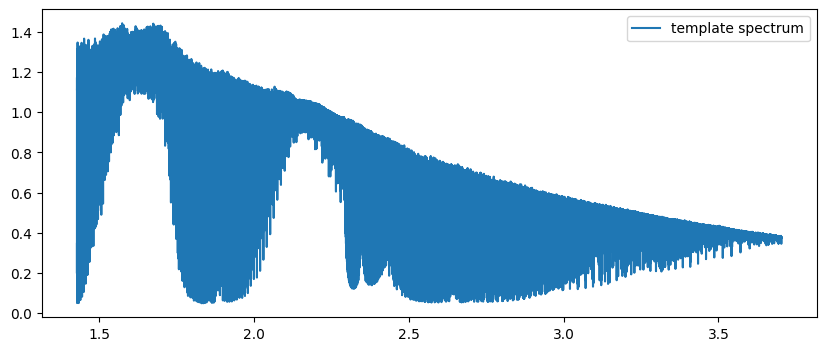

In [4]:
plt.figure(figsize=(10,4))
plt.plot(model[:,0], model[:,1], label="template spectrum")
plt.legend()

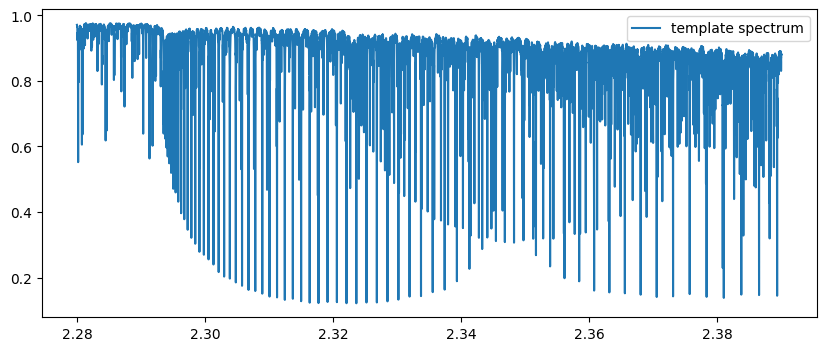

In [6]:
plt.figure(figsize=(10,4))
tind = (model[:,0] > 2.28) * (model[:,0] < 2.39)
lam = model[tind,0]
template = model[tind,1]
plt.plot(lam, template, label="template spectrum")
plt.legend()

### Cut all and save

In [46]:
for file in glob.glob(f"../data/CallieModels/original_format/t*.spec"):
    filename=file.split("/")[-1][:-5]
    print(filename)
    with open(file) as f:
        data = f.readlines()
    model = np.array([[data[i].split("\t")[0], data[i].split("\t")[1]] for i in range(2, len(data))], dtype=float)
    model.sort(axis=0)

    tind = (model[:,0] > 2.25) * (model[:,0] < 2.40)
    new_model = np.array([model[tind,0], model[tind,1]])
    c1 = fits.Column(name='wavelength (um)', array=new_model[0], format="E")
    c2 = fits.Column(name='flux ((W/m2/m)', array=new_model[1], format="E")
    t = fits.BinTableHDU.from_columns([c1, c2])
    savename = f"../data/CallieModels/{filename}.fits"
    t.writeto(savename)

t1500g1000f1_m0.0_co1.0
t1400g1000f8_m0.0_co1.0
t1500g1000f8_m0.0_co1.0
t1400g1000f1_m0.0_co1.0
t1400g1000f4_m0.0_co1.0
t1400g1000f3_m0.0_co1.0
t1500g1000f2_m0.0_co1.0
t1400g1000nc_m0.0_co1.0
t1500g1000nc_m0.0_co1.0
t1400g1000f2_m0.0_co1.0
t1500g1000f3_m0.0_co1.0
t1500g1000f4_m0.0_co1.0
